<a href="https://colab.research.google.com/github/sabatasnim/Project/blob/main/Maternal_Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#upload the dataset from your device
from google.colab import files
uploaded = files.upload()

Saving Maternal_Depression_SDS.csv to Maternal_Depression_SDS (1).csv


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files
#read file
df = pd.read_csv('Maternal_Depression_SDS.csv')

#Column-wise unique values
print("\n Unique Values for Each Column")
print("=" * 50)
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nColumn: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Count of Unique Values: {len(unique_values)}")
print("=" * 50)





 Unique Values for Each Column

Column: ageRange
Unique Values: ['<40' '>=40']
Count of Unique Values: 2

Column: religionStatus
Unique Values: ['Islam' 'Others']
Count of Unique Values: 2

Column: maritalStatus
Unique Values: ['Live with husband' 'Live without husband']
Count of Unique Values: 2

Column: qualification
Unique Values: ['<=HSC' '>HSC']
Count of Unique Values: 2

Column: occupation
Unique Values: ['Employed' 'Housewife']
Count of Unique Values: 2

Column: downHeart
Unique Values: ['a little of the time' 'some of the time']
Count of Unique Values: 2

Column: feelMorning
Unique Values: ['a little of the time' 'some of the time' 'good part of the time'
 'most of the time']
Count of Unique Values: 4

Column: cryingSpell
Unique Values: ['some of the time' 'a little of the time' 'most of the time'
 'good part of the time']
Count of Unique Values: 4

Column: troubleSleep
Unique Values: ['a little of the time' 'good part of the time' 'some of the time'
 'most of the time']
Count

In [12]:
# Numerical columns (after encoding)
print("\n Summary Statistics for Encoded Numerical Columns")
print("=" * 50)
print(df_encoded.describe())

# Categorical columns description (original dataset)
print("\nFrequency Counts for Categorical Columns (Original Dataset)")
print("=" * 50)
for column in df.columns:
    print(f"\nColumn: {column}")
    print(df[column].value_counts())
print("=" * 50)


 Summary Statistics for Encoded Numerical Columns
         ageRange   downHeart  feelMorning  cryingSpell  troubleSleep  \
count  594.000000  594.000000   594.000000   594.000000    594.000000   
mean     0.508418    0.311448     1.587542     1.661616      1.606061   
std      0.500350    0.463476     1.302448     1.190877      1.002373   
min      0.000000    0.000000     0.000000     0.000000      0.000000   
25%      0.000000    0.000000     0.000000     1.000000      1.000000   
50%      1.000000    0.000000     2.000000     2.000000      1.000000   
75%      1.000000    1.000000     3.000000     3.000000      2.000000   
max      1.000000    1.000000     3.000000     3.000000      3.000000   

          eatMuch    enjoySex  losingWeight  troubleConstipation  \
count  594.000000  594.000000    594.000000           594.000000   
mean     1.390572    1.350168      1.513468             1.441077   
std      1.195401    1.169573      1.112850             0.933215   
min      0.000000  

In [13]:
# Define categorical columns
nominal_columns = ['religionStatus', 'maritalStatus', 'qualification', 'occupation']
ordinal_columns = ['ageRange', 'downHeart', 'feelMorning', 'cryingSpell', 'troubleSleep',
                  'eatMuch', 'enjoySex', 'losingWeight', 'troubleConstipation',
                  'fasterHeartBeat', 'tiredNoReason', 'mindClear', 'findEasy',
                  'restless', 'hopefulFuture', 'moreIrritable', 'makeDecision',
                  'usefulNeedful', 'prettyFull', 'betterOffDead', 'enjoyThings', 'Class']

# One-Hot Encoding for nominal columns
df_encoded = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Label Encoding for ordinal columns
label_encoder = LabelEncoder()
for column in ordinal_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Display the first few rows of the encoded dataset
print("\nTask 5: Encoded Dataset (First 5 Rows)")
print("=" * 50)
print(df_encoded.head())

# Save the encoded dataset and provide download link
df_encoded.to_csv('Maternal_Depression_SDS_encoded.csv', index=False)
print("\nEncoded dataset saved as 'Maternal_Depression_SDS_encoded.csv'")
files.download('Maternal_Depression_SDS_encoded.csv')
print("=" * 50)


Task 5: Encoded Dataset (First 5 Rows)
   ageRange  downHeart  feelMorning  cryingSpell  troubleSleep  eatMuch  \
0         0          0            0            3             0        0   
1         0          0            0            3             1        3   
2         0          0            3            3             1        0   
3         0          0            0            3             1        0   
4         0          0            3            3             1        0   

   enjoySex  losingWeight  troubleConstipation  fasterHeartBeat  ...  \
0         3             3                    1                0  ...   
1         3             1                    1                0  ...   
2         0             0                    2                0  ...   
3         0             0                    3                0  ...   
4         0             3                    1                0  ...   

   makeDecision  usefulNeedful  prettyFull  betterOffDead  enjoyThings  Clas

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ordinal_mapping = {
    "a little of the time": 1,
    "some of the time": 2,
    "good part of the time": 3,
    "most of the time": 4
}

sds_columns = df.columns[5:25]

# Convert these responses to numbers
df_numeric = df[sds_columns].replace(ordinal_mapping)



In [ ]:
df['DepressionLevel'] = df['Class'].map({
    'Not Depressed': 0,
    'Mild Depressed': 1,
    'Moderate Depressed': 2,
    'Severe Depressed': 3
})

# Add this to the numeric dataframe
df_numeric['DepressionLevel'] = df['DepressionLevel']


In [ ]:
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                     downHeart  feelMorning  cryingSpell  troubleSleep  \
downHeart             1.000000     0.334889     0.253336     -0.044027   
feelMorning           0.334889     1.000000     0.173687      0.049521   
cryingSpell           0.253336     0.173687     1.000000     -0.058704   
troubleSleep         -0.044027     0.049521    -0.058704      1.000000   
eatMuch               0.274197     0.339935     0.428477     -0.016192   
enjoySex              0.298197     0.250549     0.414933     -0.015247   
losingWeight          0.045667     0.135480     0.113306      0.128399   
troubleConstipation  -0.210953    -0.140979    -0.254032      0.127932   
fasterHeartBeat       0.298582     0.241066     0.314455     -0.037702   
tiredNoReason         0.236776     0.270198     0.251059     -0.022306   
mindClear             0.314450     0.256638     0.417972     -0.018100   
findEasy              0.247594     0.266242     0.409839     -0.054985   
restless             -0.018321     0.1

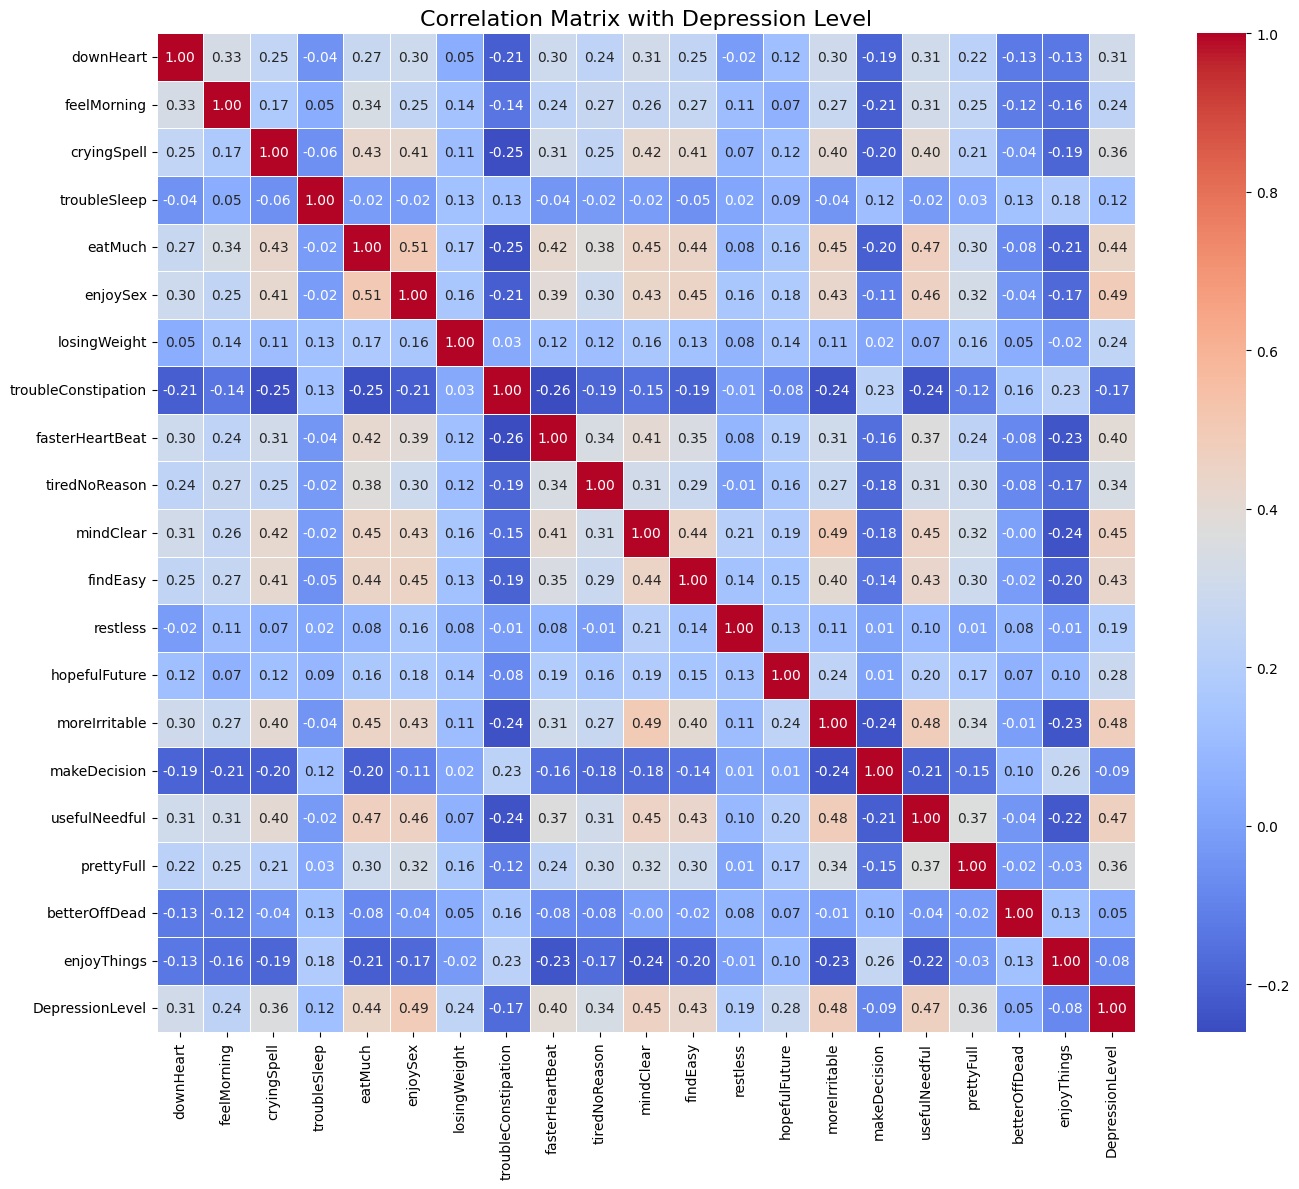

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Depression Level", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
categorical_cols = df.select_dtypes(include=['object', 'category'])

numerical_cols = df.select_dtypes(include=['int64', 'float64'])

print("Number of categorical columns:", len(categorical_cols.columns))
print("Categorical column names:", list(categorical_cols.columns))

print("\nNumber of numerical columns:", len(numerical_cols.columns))
print("Numerical column names:", list(numerical_cols.columns))

df.isnull().sum()

NameError: name 'df' is not defined